In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [30]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [31]:
y_train.shape

(50000, 1)

In [32]:
y_train=y_train.flatten()
y_test=y_test.flatten()

In [33]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes[9]

'truck'

In [34]:
def plot_sample(X,y,index):
    print(f"Image index: {index}, True label: {y[index]}, Class: {classes[y[index]]}")
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

Image index: 2, True label: 9, Class: truck


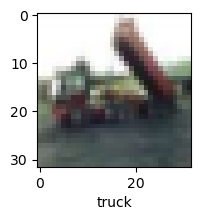

In [36]:
plot_sample(X_train,y_train,2)

In [39]:
X_train=X_train/255
X_test=X_test/255

In [40]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

C:\Users\91877\AJ\python\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.3025 - loss: 1.9294
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.4189 - loss: 1.6452
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.4521 - loss: 1.5500
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.4783 - loss: 1.4901
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.4989 - loss: 1.4296


In [41]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4844 - loss: 1.4589


[1.467545509338379, 0.4796000123023987]

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.60      0.56      1000
           1       0.67      0.55      0.60      1000
           2       0.39      0.30      0.34      1000
           3       0.31      0.38      0.34      1000
           4       0.57      0.15      0.23      1000
           5       0.39      0.38      0.39      1000
           6       0.37      0.76      0.50      1000
           7       0.55      0.55      0.55      1000
           8       0.65      0.59      0.62      1000
           9       0.61      0.54      0.57      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.47     10000
weighted avg       0.51      0.48      0.47     10000



In [49]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

C:\Users\91877\AJ\python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [51]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.3879 - loss: 1.6766
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6100 - loss: 1.1134
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6614 - loss: 0.9668
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7023 - loss: 0.8563
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7262 - loss: 0.7887
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7440 - loss: 0.7422
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7617 - loss: 0.6740
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7820 - loss: 0.6236
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7941 - loss: 0.5860
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8091 - loss: 0.5391


In [52]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7050 - loss: 0.9209


[0.9237507581710815, 0.7060999870300293]

In [53]:
y_test=y_test.flatten()

Image index: 1, True label: 8, Class: ship


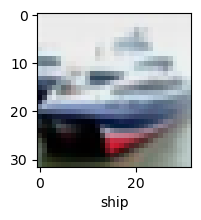

In [54]:
plot_sample(X_test,y_test,1)

In [56]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[2.25103032e-02, 1.69177176e-04, 1.08648762e-02, 8.51952672e-01,
        9.62728634e-03, 8.94756317e-02, 7.69086508e-03, 1.32839486e-03,
        2.64949258e-03, 3.73130175e-03],
       [1.56087114e-03, 6.07151210e-01, 8.06943831e-07, 1.90356218e-07,
        2.89672144e-08, 2.28175203e-08, 3.62777541e-07, 6.13882140e-11,
        3.90670955e-01, 6.15579833e-04],
       [3.39489311e-01, 1.43167943e-01, 2.36482965e-03, 3.57995508e-03,
        4.34021873e-04, 2.39277189e-03, 3.17360857e-04, 1.06623047e-03,
        4.96966928e-01, 1.02206459e-02],
       [5.71185708e-01, 6.72843380e-05, 2.87346798e-03, 1.63506484e-04,
        1.69942365e-03, 1.74540594e-06, 6.25519315e-05, 9.25326003e-06,
        4.23930168e-01, 6.96762891e-06],
       [1.84265741e-06, 1.02256092e-06, 1.06192706e-03, 1.60436835e-02,
        4.63957667e-01, 1.01917285e-04, 5.18815458e-01, 1.43903944e-05,
        1.87237310e-06, 2.51817568e-07]], dtype=float32)

In [60]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 6]

In [61]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

Image index: 5, True label: 6, Class: frog


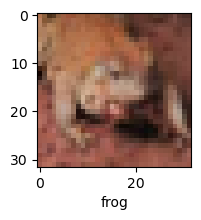

In [68]:
plot_sample(X_test,y_test,5)

In [63]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [69]:
classes[y_classes[5]]

'frog'

In [67]:
print("Classification Report: \n",classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.82      0.74      1000
           1       0.78      0.84      0.81      1000
           2       0.54      0.63      0.59      1000
           3       0.59      0.43      0.50      1000
           4       0.70      0.63      0.66      1000
           5       0.64      0.58      0.61      1000
           6       0.74      0.82      0.78      1000
           7       0.78      0.75      0.76      1000
           8       0.84      0.79      0.82      1000
           9       0.79      0.76      0.77      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000

